# Homework
1. Plot the training loss with different learning rates in linear model.
2. Plot the error surface linear model(axis x for $\mathbf{w}_1$, axis y for for $\mathbf{w}_2$, axis z for loss)
3. Design five input nodes and one output node linear model and plot the training loss.(train on train_X1 and train_y1)
4. Design ten input nodes and five output nodes linear model and plot the training loss.(train on train_X2 and train_y2)
5. Design one hundred input nodes and one output node linear model, then convert model from linear to nonlinear(like $y = b + \mathbf{w}_1\mathbf{x} + \mathbf{w}_2\mathbf{x}^2 + ... + \mathbf{w}_n\mathbf{x}^n $) and record the training loss in different power.(train on train_X3 and train_y3)

In [ ]:
# run this before anything begins

%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

### 1. Plot the training loss with different learning rates in linear model.

epoch 1, loss 16.211189
epoch 2, loss 15.230468
epoch 3, loss 14.309179
epoch 4, loss 13.443702
epoch 5, loss 12.630657
epoch 6, loss 11.866849
epoch 7, loss 11.149305
epoch 8, loss 10.475210
epoch 9, loss 9.841926
epoch 10, loss 9.246992
epoch 1, loss 9.227858
epoch 2, loss 4.942870
epoch 3, loss 2.649395
epoch 4, loss 1.420972
epoch 5, loss 0.762581
epoch 6, loss 0.409529
epoch 7, loss 0.220070
epoch 8, loss 0.118348
epoch 9, loss 0.063697
epoch 10, loss 0.034312
epoch 1, loss 0.030813
epoch 2, loss 0.000107
epoch 3, loss 0.000050
epoch 4, loss 0.000050
epoch 5, loss 0.000050
epoch 6, loss 0.000050
epoch 7, loss 0.000050
epoch 8, loss 0.000050
epoch 9, loss 0.000050
epoch 10, loss 0.000050
epoch 1, loss 0.000053
epoch 2, loss 0.000054
epoch 3, loss 0.000050
epoch 4, loss 0.000056
epoch 5, loss 0.000052
epoch 6, loss 0.000053
epoch 7, loss 0.000054
epoch 8, loss 0.000053
epoch 9, loss 0.000052
epoch 10, loss 0.000055


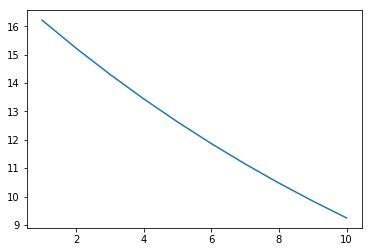

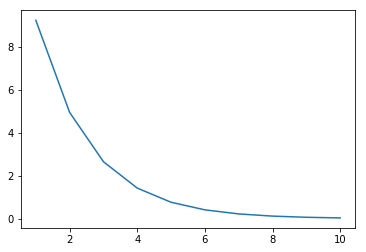

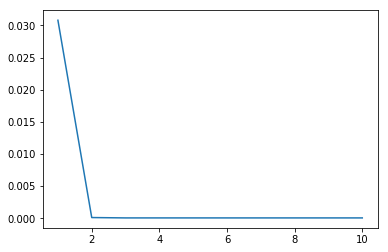

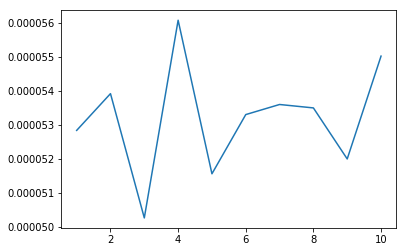

In [37]:
num_inputs = 2
num_examples = 1000
true_w = np.array([2, -3.4])
true_b = 4.2
features = np.random.normal(scale=1, size=(num_examples, num_inputs))
labels = np.dot(features, true_w) + true_b
labels += np.random.normal(scale=0.01, size=labels.shape)

batch_size = 10


###########################################################################################
# TODO

def reset():
    global w, b
    w = np.random.normal(scale=0.01, size=(num_inputs, 1))
    b = np.zeros(shape=(1,))

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis = 0), labels.take(j, axis = 0)

def linreg(X, w, b):
    return np.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(lr, batch_size, w_grad, b_grad):
    global w, b
    w = w - lr * w_grad / batch_size
    b = b - lr * b_grad / batch_size

net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

reset()

def train(num_epochs, lr):
    datas = []
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            y_hat = net(X, w, b)
            l = loss(y_hat, y)  # Minibatch loss in X and y
            w_grad = np.dot(X.T, (y_hat - y.reshape(y_hat.shape)))        
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)  # Update parameters using their gradient
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))
        datas.append(train_l.mean())
    return datas

plt.plot(list(range(1,11)),train(10, 0.0003))
plt.figure()
reset()
plt.plot(list(range(1,11)),train(10, 0.003))
plt.figure()
reset()
plt.plot(list(range(1,11)),train(10, 0.03))
plt.figure()
reset()
plt.plot(list(range(1,11)),train(10, 0.3))
###########################################################################################

### 2. Plot the error surface linear model(axis x for $\mathbf{w}_1$, axis y for for $\mathbf{w}_2$, axis z for loss)

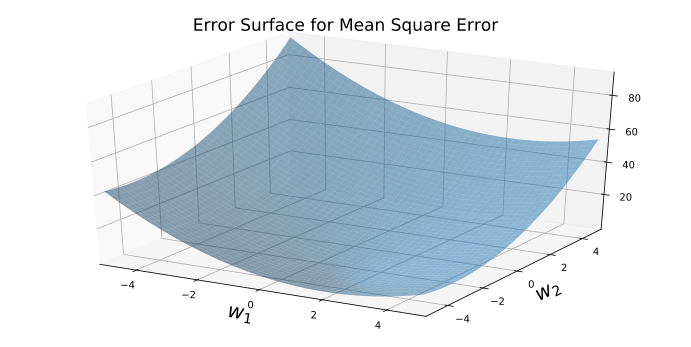

In [19]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

num_inputs = 2
num_examples = 1000
true_w = np.array([2, -3.4])
true_b = 4.2
features = np.random.normal(scale=1, size=(num_examples, num_inputs))
labels = np.dot(features, true_w) + true_b
labels += np.random.normal(scale=0.01, size=labels.shape)

def get_least_square_loss(X, y, w, b):
   
    total_loss = 0.0
    for i in range(X.shape[0]):
        x_i = X[i,:]
        z = w.dot(x_i) + b
        ###########################################################################################
        # TODO
        ###########################################################################################
        total_loss += 
        ###########################################################################################
    return total_loss / X.shape[0]
    
def plot_error_surface(X, y):
    NX = 50
    NY = 50

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim3d([-5, 5.0])
    ax.set_ylim3d([-5, 5.0])
    ax.set_xlabel('$w_1$', size=20)
    ax.set_ylabel('$w_2$', size=20)
   
    xs = np.linspace(-5, 5, NX)
    ys = np.linspace(-5, 5, NY)
    xv, yv = np.meshgrid(xs, ys)
    
    w_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)
    losses = []
    for i in range(w_fake.shape[0]):   
        losses.append(get_least_square_loss(X, y, w_fake[i,:], true_b))  
    losses = np.array(losses)
    ax.set_title('Error Surface for Mean Square Error', fontsize=17)    
    ax.plot_surface(xv, yv, losses.reshape(NX, NY), alpha=0.5)

for X, y in data_iter(batch_size, features, labels):
    plot_error_surface(X, y)
    break

### 3. Design five input nodes and one output node linear model and plot the training loss.(train on train_X1 and train_y1)

epoch 1, loss 1.278980
epoch 2, loss 1.260423
epoch 3, loss 1.243889
epoch 4, loss 1.229391
epoch 5, loss 1.216269
epoch 6, loss 1.204676
epoch 7, loss 1.194412
epoch 8, loss 1.185303
epoch 9, loss 1.177552
epoch 10, loss 1.169882
epoch 11, loss 1.163325
epoch 12, loss 1.157763
epoch 13, loss 1.152671
epoch 14, loss 1.148635
epoch 15, loss 1.143696
epoch 16, loss 1.139891
epoch 17, loss 1.136854
epoch 18, loss 1.134077
epoch 19, loss 1.130990
epoch 20, loss 1.128397
epoch 21, loss 1.127085
epoch 22, loss 1.124237
epoch 23, loss 1.122824
epoch 24, loss 1.120763
epoch 25, loss 1.119290
epoch 26, loss 1.118057
epoch 27, loss 1.117479
epoch 28, loss 1.115618
epoch 29, loss 1.114605
epoch 30, loss 1.113659
epoch 31, loss 1.112810
epoch 32, loss 1.112040
epoch 33, loss 1.111727
epoch 34, loss 1.111010
epoch 35, loss 1.110076
epoch 36, loss 1.109825
epoch 37, loss 1.109011
epoch 38, loss 1.108764
epoch 39, loss 1.108113
epoch 40, loss 1.107792
epoch 41, loss 1.107408
epoch 42, loss 1.107041
e

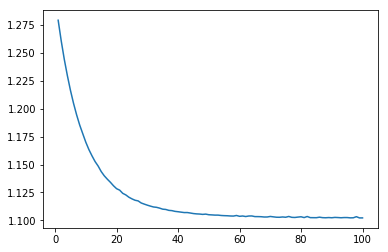

In [51]:
import pickle

num_inputs = 5
num_examples = 1000
w = np.random.normal(scale=0.01, size=(num_inputs, 1))
b = np.zeros(shape=(1,))
features = np.array(pickle.load(open("train_X1.pkl", "rb")))
labels = np.array(pickle.load(open("train_y1.pkl", "rb")))
###########################################################################################
# TODO
    
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis = 0), labels.take(j, axis = 0)

def linreg(X, w, b):
    return np.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(lr, batch_size, w_grad, b_grad):
    global w, b
    w = w - lr * w_grad / batch_size
    b = b - lr * b_grad / batch_size

net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

reset()

def train(num_epochs, lr):
    datas = []
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            y_hat = net(X, w, b)
            l = loss(y_hat, y)  # Minibatch loss in X and y
            w_grad = np.dot(X.T, (y_hat - y.reshape(y_hat.shape)))        
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)  # Update parameters using their gradient
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))
        datas.append(train_l.mean())
    return datas

plt.plot(list(range(1,101)),train(100, 0.008))
###########################################################################################

pickle.dump(w, open("weights1.pkl", "wb"))
pickle.dump(b, open("bias1.pkl", "wb"))

In [45]:
""" I will use your trained weights to do testing """
w1 = np.array(pickle.load(open("weights1.pkl", "rb")))
b1 = np.array(pickle.load(open("bias1.pkl", "rb")))
test_X = np.array(pickle.load(open("test_X1.pkl", "rb")))
test_y = np.array(pickle.load(open("test_y1.pkl", "rb")))
test_l = loss(net(test_X, w1, b1), test_y) 
print("test loss: %f" % (test_l.mean()))

FileNotFoundError: [Errno 2] No such file or directory: 'test_X1.pkl'

### 4. Design ten input nodes and five output nodes linear model and plot the training loss.(train on train_X2 and train_y2)

epoch 1, loss 4.431313
epoch 2, loss 3.887782
epoch 3, loss 3.446273
epoch 4, loss 3.085414
epoch 5, loss 2.789531
epoch 6, loss 2.546774
epoch 7, loss 2.347330
epoch 8, loss 2.183435
epoch 9, loss 2.048475
epoch 10, loss 1.937491
epoch 11, loss 1.846062
epoch 12, loss 1.770763
epoch 13, loss 1.708710
epoch 14, loss 1.657582
epoch 15, loss 1.615443
epoch 16, loss 1.580625
epoch 17, loss 1.551918
epoch 18, loss 1.528284
epoch 19, loss 1.508719
epoch 20, loss 1.492576
epoch 21, loss 1.479254
epoch 22, loss 1.468232
epoch 23, loss 1.459134
epoch 24, loss 1.451567
epoch 25, loss 1.445313
epoch 26, loss 1.440132
epoch 27, loss 1.435863
epoch 28, loss 1.432305
epoch 29, loss 1.429355
epoch 30, loss 1.426925
epoch 31, loss 1.424907
epoch 32, loss 1.423219
epoch 33, loss 1.421827
epoch 34, loss 1.420684
epoch 35, loss 1.419722
epoch 36, loss 1.418919
epoch 37, loss 1.418254
epoch 38, loss 1.417710
epoch 39, loss 1.417250
epoch 40, loss 1.416865
epoch 41, loss 1.416544
epoch 42, loss 1.416281
e

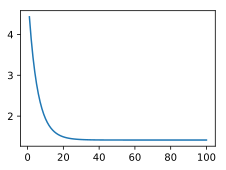

In [22]:
import pickle
num_inputs = 10
num_outputs = 5
num_examples = 1000

features = np.array(pickle.load(open("train_X2.pkl", "rb")))
labels = np.array(pickle.load(open("train_y2.pkl", "rb")))
###########################################################################################
# TODO
###########################################################################################

###########################################################################################
pickle.dump(w, open("weights2.pkl", "wb"))
pickle.dump(b, open("bias2.pkl", "wb"))

In [23]:
""" I will use your trained weights to do testing """
w2 = np.array(pickle.load(open("weights2.pkl", "rb")))
b2 = np.array(pickle.load(open("bias2.pkl", "rb")))
test_X = np.array(pickle.load(open("test_X2.pkl", "rb")))
test_y = np.array(pickle.load(open("test_y2.pkl", "rb")))
test_l = loss(net(test_X, w2, b2), test_y) 
print("test loss: %f" % (test_l.mean()))

test loss: 1.470438


### 5. Design one hundred input nodes and one output node linear model, then convert model from linear to nonlinear(like $y = b + \mathbf{w}_1\mathbf{x} + \mathbf{w}_2\mathbf{x}^2 + ... + \mathbf{w}_n\mathbf{x}^n $) and record the training loss in different power.(train on train_X3 and train_y3)

In [24]:
import pickle

num_inputs = 100
num_examples = 1000

train_X3 = np.array(pickle.load(open("train_X3.pkl", "rb")))
train_y3 = np.array(pickle.load(open("train_y3.pkl", "rb")))
test_X3 = np.array(pickle.load(open("test_X3.pkl", "rb")))
test_y3 = np.array(pickle.load(open("test_y3.pkl", "rb")))

poly_power_list = [1, 10, 100, 1000] # change this can get different result
lr = 0.005
num_epochs = 200
net = linreg  
loss = squared_loss
###########################################################################################
# TODO
###########################################################################################

###########################################################################################

poly_power: 1, train loss: 0.990428, test loss: 1.215350
poly_power: 10, train loss: 0.867607, test loss: 1.412933
poly_power: 100, train loss: 0.706366, test loss: 1.637014
poly_power: 1000, train loss: 0.543383, test loss: 2.398963


KeyboardInterrupt: 